In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
df = pd.read_csv("statistics.csv", sep = '\s*,\s*', engine = 'python')

if not os.path.exists("../images"):
    os.makedirs("../images")

In [3]:
df.head()

,name,bugs,security_hotspots,code_smells,complexity,duplicated_lines,debt
0,p0,17,2,448,596,3.4,4062
1,p1,15,2,217,607,0.0,2059
2,p2,5,4,226,360,8.2,1995
3,p3,14,5,215,434,0.0,1890
4,p4,13,0,328,393,4.6,3039


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               95 non-null     object 
 1   bugs               95 non-null     int64  
 2   security_hotspots  95 non-null     int64  
 3   code_smells        95 non-null     int64  
 4   complexity         95 non-null     int64  
 5   duplicated_lines   95 non-null     float64
 6   debt               95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [3]:
df.describe()

,bugs,security_hotspots,code_smells,complexity,duplicated_lines,debt
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,18.642105,7.747368,362.147368,619.305263,5.177895,3669.768421
std,11.119195,13.353594,146.032055,188.399196,4.235443,1508.089714
min,0.000000,0.000000,151.000000,169.000000,0.000000,1349.000000
25%,12.500000,2.000000,255.500000,511.000000,2.500000,2613.000000
50%,17.000000,5.000000,325.000000,607.000000,4.200000,3423.000000
75%,22.000000,9.000000,433.000000,728.000000,6.950000,4327.000000
max,74.000000,123.000000,816.000000,1158.000000,20.800000,8170.000000


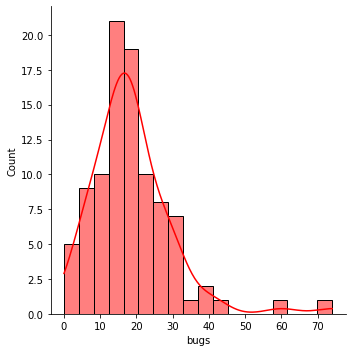

In [4]:
sns.displot(df, x = 'bugs',kde=True,color ='red')
plt.savefig('../images/hist_age.pdf', format='pdf')


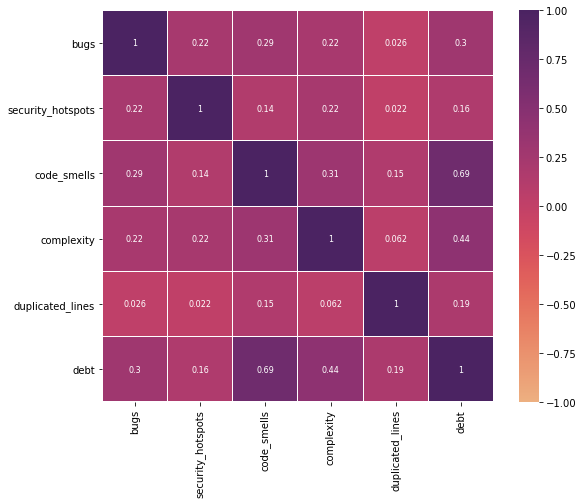

In [6]:
#correlação entre variáveis.
corr = df.corr("kendall")
plt.figure(figsize = (10,8))
sns_plot = sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
                       cmap = 'flare', vmax = 1, vmin = -1.0, linewidths = 0.1, annot = True, annot_kws = {"size":8}, square = True)

plt.gcf().subplots_adjust(bottom=0.20)
plt.gcf().subplots_adjust(left=0.20)
plt.savefig('../images/heatmap.eps', format='eps')


<Figure size 3600x720 with 0 Axes>

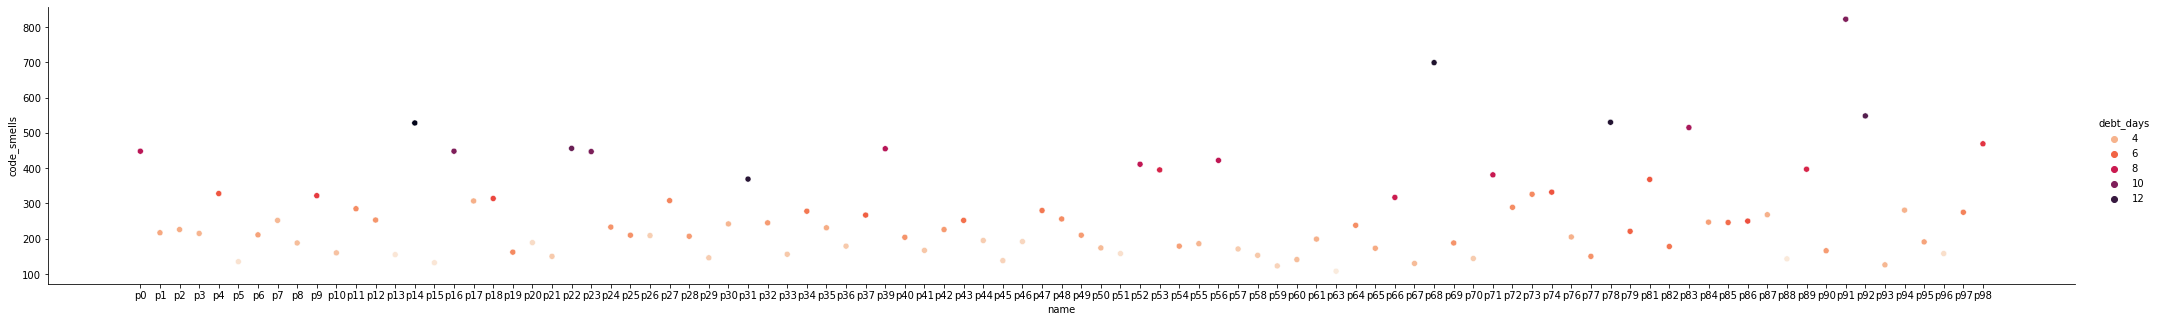

In [7]:

#sns.displot(x = 'name', y='code_smells', data = df)
df["debt_days"]=(df["debt"] / 60)/8
plt.figure(figsize = (50,10))
sns.relplot(
    data=df,
    x="name", y="code_smells",hue="debt_days",aspect=6,palette="rocket_r"
)
plt.gcf().subplots_adjust(left=0.05)
plt.gcf().subplots_adjust(bottom=0.20)

plt.savefig('../images/code_smells_Time.eps', format='eps')




In [8]:
df.describe()

,bugs,security_hotspots,code_smells,complexity,duplicated_lines,debt,debt_days
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,18.378947,7.968421,264.989474,700.726316,5.546316,2583.347368,5.381974
std,11.313877,13.778223,129.842416,824.505015,6.183675,1225.457872,2.553037
min,0.000000,0.000000,108.000000,169.000000,0.000000,1110.000000,2.312500
25%,11.000000,2.000000,173.500000,511.000000,2.500000,1770.500000,3.688542
50%,17.000000,5.000000,226.000000,607.000000,4.200000,2214.000000,4.612500
75%,22.000000,9.500000,315.500000,736.000000,7.150000,3028.000000,6.308333
max,74.000000,123.000000,822.000000,8441.000000,50.600000,6567.000000,13.681250
